# IMPORTANT

In [3]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf
import scipy.stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

## a) Conjugate priors could lead to posterior distributions that have the same functional form as the priors which then leads to a greatly simplified Bayesian analysis.
## b) True

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False)  
    a) Using a Laplacian prior will lead to the Ridge Regression  
    b) Using a Laplacian prior will lead to Lasso Regression

2) (True or False)  
    a) Ridge can often help with feature selection  
    b) Lasso can often help with feature selection

## 1) (a) F (b) T
## 2) (a) F (b) T

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  
1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

## 1. a) Ridge regression
## 1. b) Lasso regression
## 2. Ridge regression
## 3. Lasso regression
## 4. 0
## 5. validation set

# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

## I would use ridge regression in that when the variables are highly correlated, then this is going to lead to a ill-condition which means that through OLS, the w is going to be really big cuz OLS is very sensitive to noises, which means that Y is going to be really sensitive to X because Y = wTx. However, ridge regression could limit and minimize W which stop Y from being sensitive to X thus reducing the multicollinearity.

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

In [1]:
y = 14
x = 4
sigma = 2
omega1 = 4
sigma1 = 2
mu_post = (sigma**-2*y*x+sigma1**-2*omega1)/(x**2*sigma**-2+sigma1**-2)
sigma_post = 1/((sigma1**-2+x**2*sigma**-2)**0.5)
print('the posterior distribution is N({},{})'.format(mu_post,sigma_post))

the posterior distribution is N(3.52941176471,0.485071250073)


In [6]:
print('the probability of having w < 4 is {}%'.format(scipy.stats.norm.cdf(4,mu_post,sigma_post)*100))

the probability of having w < 4 is 83.4012266459%


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [48]:
## Learn to use numpy - Will be more useful in future
data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

In [49]:
def modelEval(lm, key):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [50]:
data_train.columns = 'x'+data_train.columns
data_test.columns = 'x'+data_test.columns

In [51]:
data_train.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'x35', u'x36',
       u'x37', u'x38', u'x39', u'x40'],
      dtype='object')

In [52]:
lm = smf.ols(formula='x40~-1+'+'+'.join(data_train.columns[:-1]),data=data_train).fit()
print('the training set R2 is {} and the test set R2 is {}'.format(lm.rsquared,modelEval(lm,'x40')))

the training set R2 is 1.0 and the test set R2 is -1.02796436413


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

## 1. Ridge

In [53]:
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
X_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

In [55]:
Ridge=linear_model.Ridge(fit_intercept=False, alpha=3000) #try Ridge with an arbitrary regularization parameter lambda=3000

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for train set Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for test set Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for train set Ridge is: 0.91834582591
The R-squared we found for test set Ridge is: 0.522772634124


## 2. Lasso

In [57]:
Lasso=linear_model.Lasso(fit_intercept=False,alpha=30)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for train set Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for test set Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for train set Lasso is: 0.91834582591
The R-squared we found for test set Lasso is: 0.63746274109


C:\Users\sddz0\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


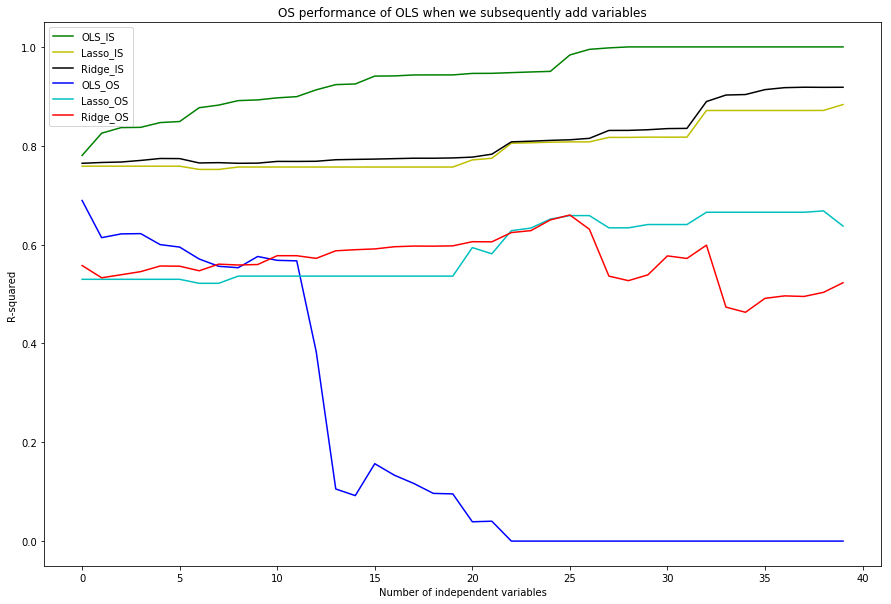

In [142]:
Number_variables = range(40)
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Ridge=linear_model.Ridge(fit_intercept=False,alpha=3000)
Lasso=linear_model.Lasso(fit_intercept=False, alpha=30)

for j in Number_variables:
    # OLS
    lm = smf.ols(formula = 'x40 ~ '+ '+'.join(data_train.columns[:j+1]), 
                 data = data_train).fit()
    error = lm.predict(X_test.iloc[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.iloc[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.iloc[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.iloc[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.iloc[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.iloc[:,0:j+1])
    if j == 0 :
        p_IS = p_IS.reshape(len(X_train.index),)
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.iloc[:,0:j+1])
    if j == 0 :
        p_OS = p_OS.reshape(len(X_test.index),)
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

plt.figure(figsize=(15,10))
plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='best')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

## Ridge

In [160]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train0,X_valid,y_train0,y_valid,lambdas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.figure(figsize=(15,10))
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='best')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

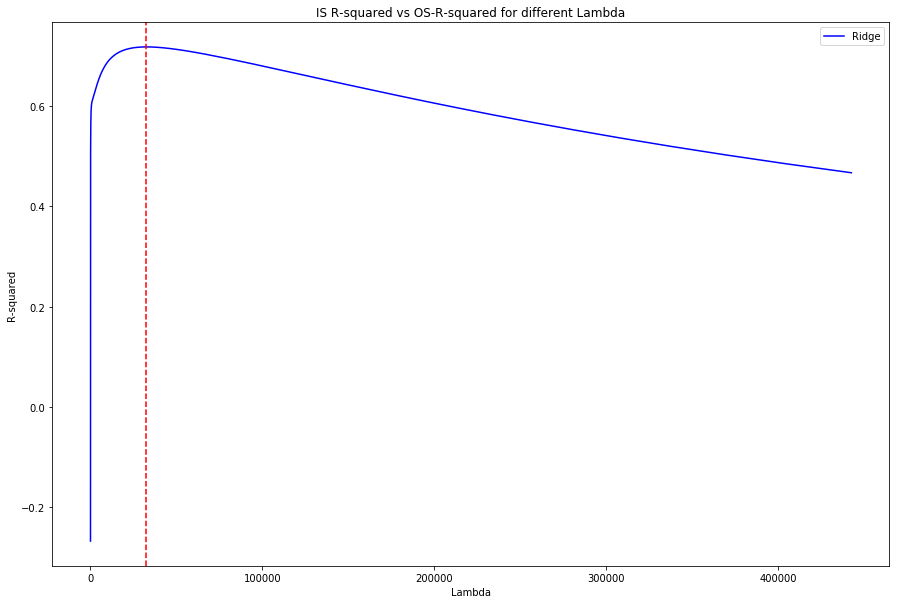

Optimal lambda for Ridge=32108.7681243
The R-squared we found for train set Ridge is: 0.861236708166
The R-squared we found for test set Ridge is: 0.682464693234


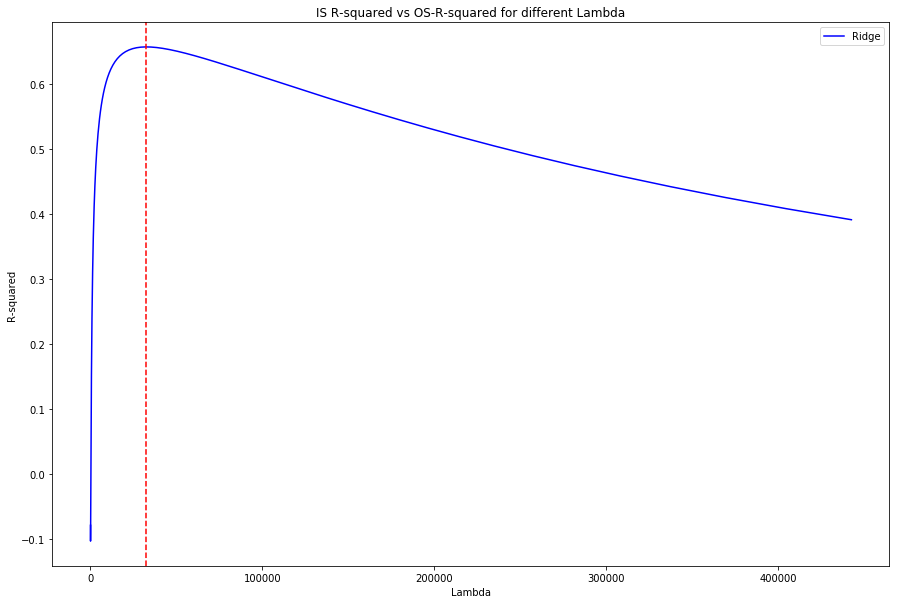

Optimal lambda for Ridge=32108.7681243
The R-squared we found for train set Ridge is: 0.861236708166
The R-squared we found for test set Ridge is: 0.682464693234


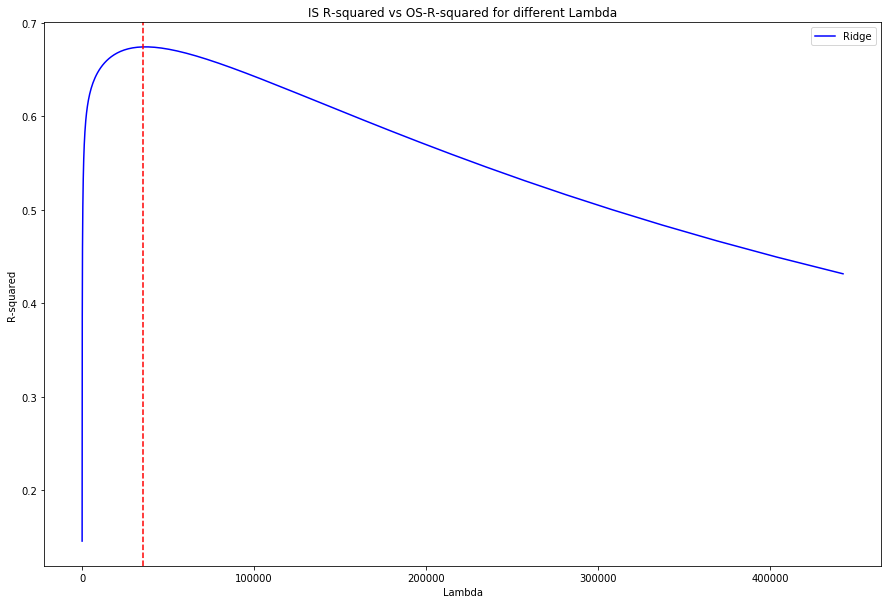

Optimal lambda for Ridge=35148.481067
The R-squared we found for train set Ridge is: 0.857828466469
The R-squared we found for test set Ridge is: 0.687271775576


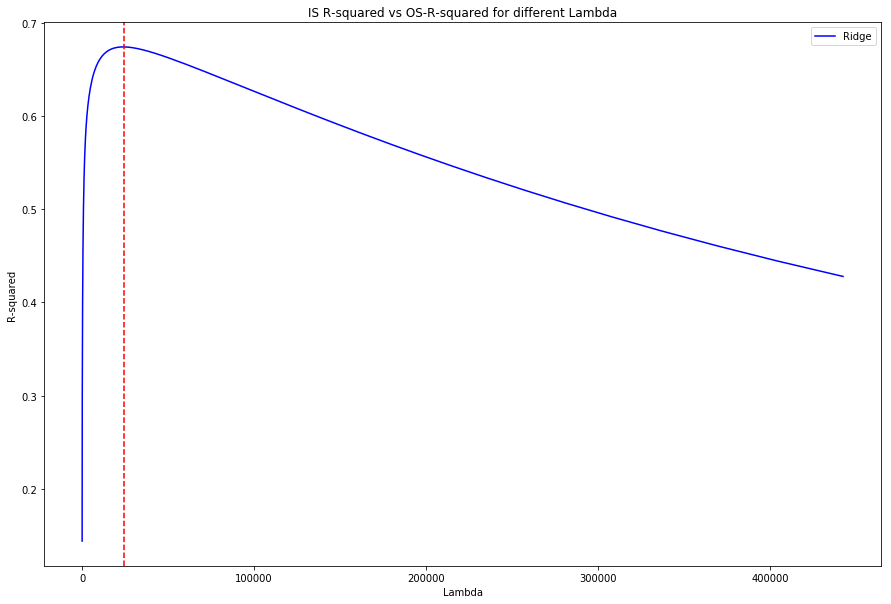

Optimal lambda for Ridge=24477.9413569
The R-squared we found for train set Ridge is: 0.871060321935
The R-squared we found for test set Ridge is: 0.667860775432


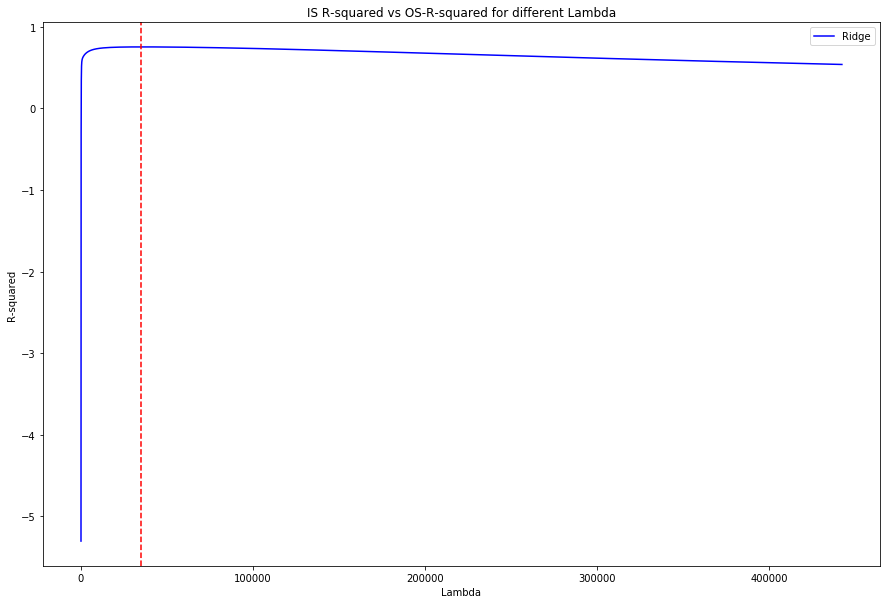

Optimal lambda for Ridge=35148.481067
The R-squared we found for train set Ridge is: 0.857828466469
The R-squared we found for test set Ridge is: 0.687271775576


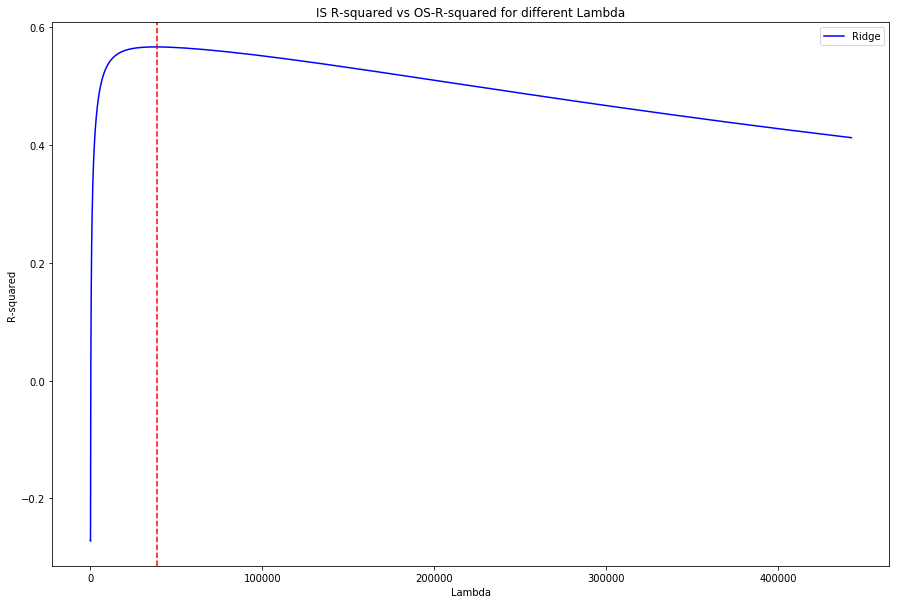

Optimal lambda for Ridge=38475.961349
The R-squared we found for train set Ridge is: 0.854361894146
The R-squared we found for test set Ridge is: 0.692042847311


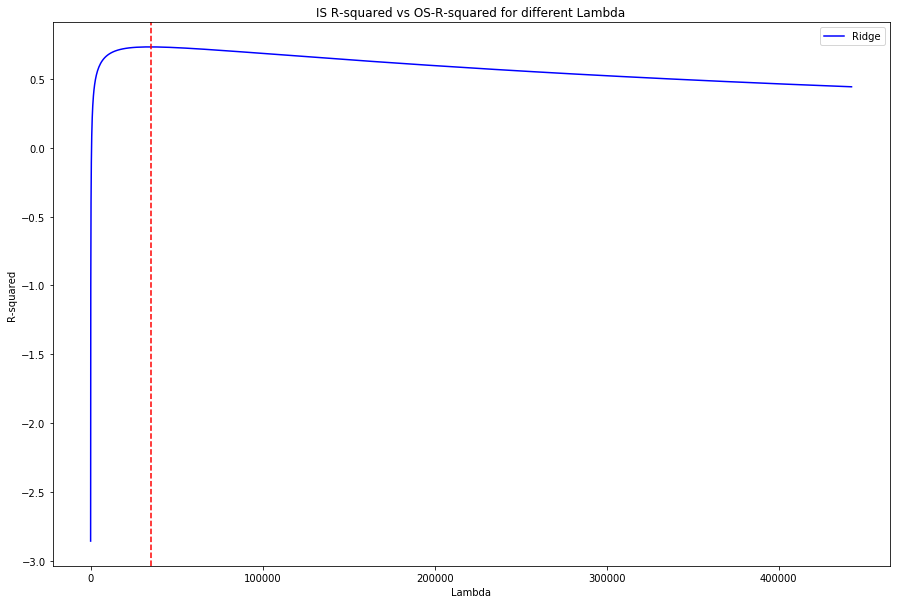

Optimal lambda for Ridge=35148.481067
The R-squared we found for train set Ridge is: 0.857828466469
The R-squared we found for test set Ridge is: 0.687271775576


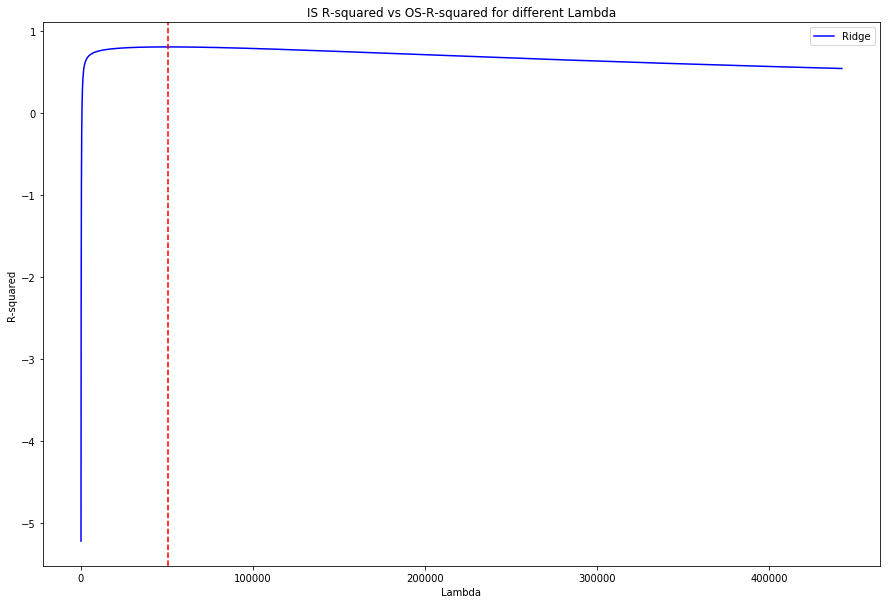

Optimal lambda for Ridge=50470.5728029
The R-squared we found for train set Ridge is: 0.8436500791
The R-squared we found for test set Ridge is: 0.706077184226


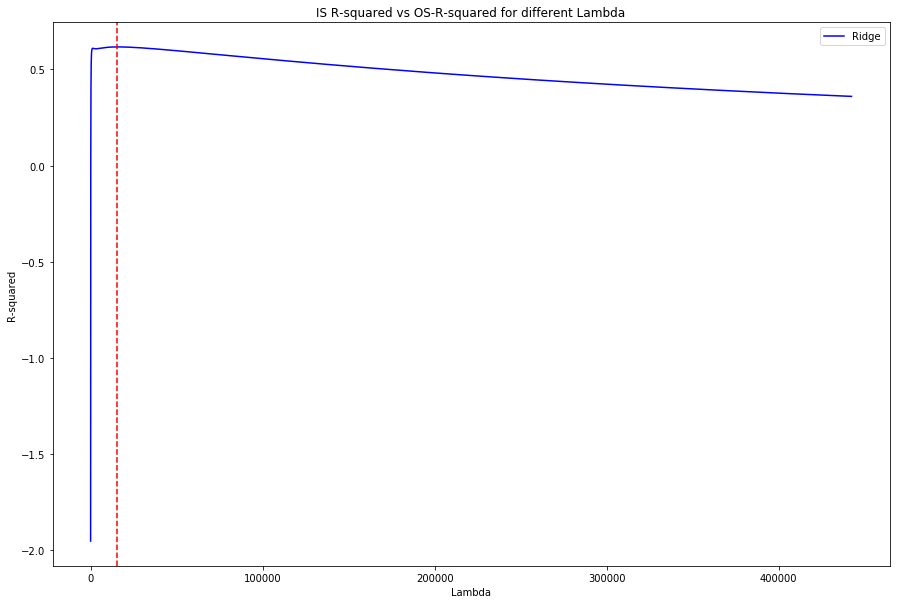

Optimal lambda for Ridge=15572.5703027
The R-squared we found for train set Ridge is: 0.885769621478
The R-squared we found for test set Ridge is: 0.642868827737


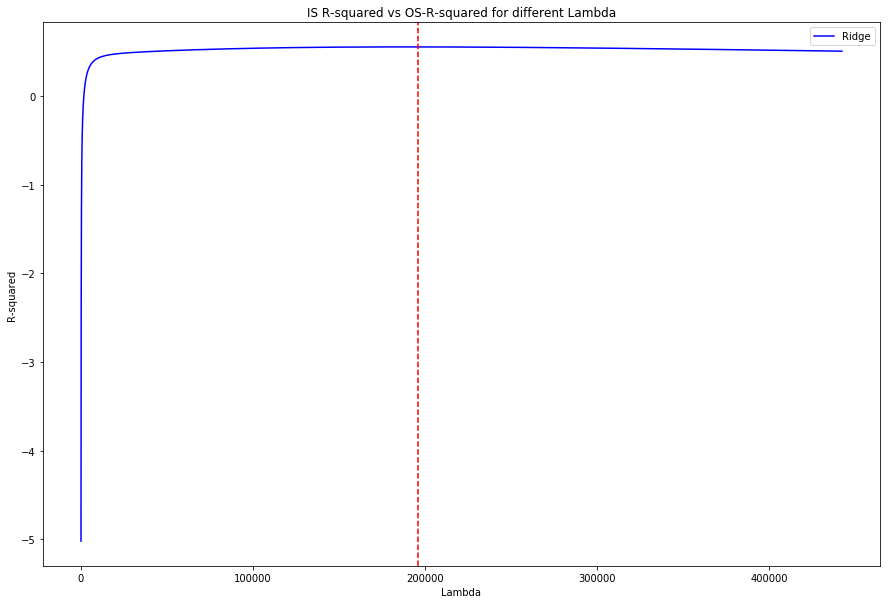

Optimal lambda for Ridge=196011.703515
The R-squared we found for train set Ridge is: 0.780793007107
The R-squared we found for test set Ridge is: 0.758423565697


In [167]:
#select best lambda for Ridge
for i in range(10):
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.3)
    lambdas = np.exp(np.linspace(-5,13,200))
    lambda_r_optimal=Regularization_fit_lambda(1,X_train0,X_valid,y_train0,y_valid,lambdas,Graph=True)
    print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))
    Ridge=linear_model.Ridge(fit_intercept=False, alpha=lambda_r_optimal) #try Ridge with an arbitrary regularization parameter lambda=3000

    Ridge.fit(X_train,y_train)
    # In the sample:
    p_IS=Ridge.predict(X_train)
    err_IS=p_IS-y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    print("The R-squared we found for train set Ridge is: {0}".format(R_2_IS_Ridge))

    Ridge_coef=Ridge.coef_

    #Out of sample
    p_OS=Ridge.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    print("The R-squared we found for test set Ridge is: {0}".format(R_2_OS_Ridge))

## Lasso

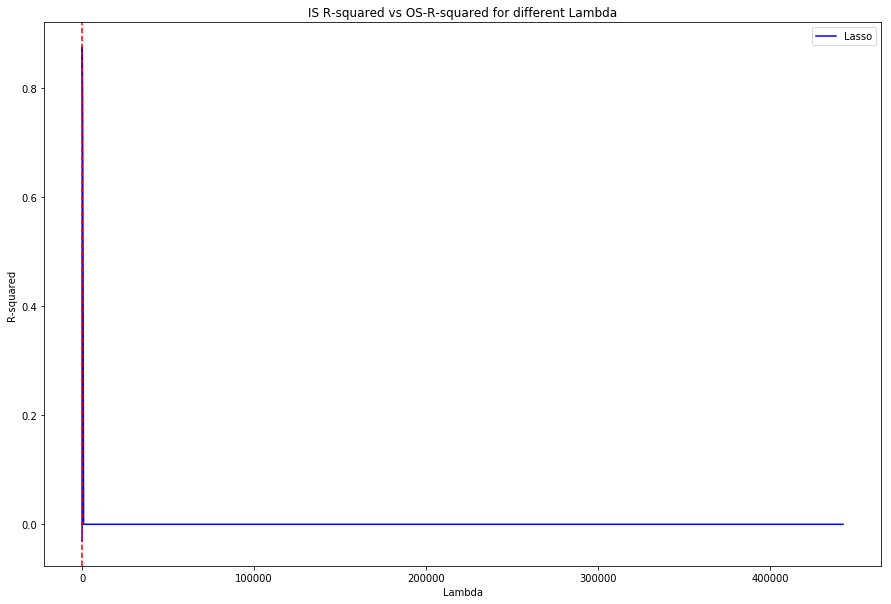

Optimal lambda for Lasso=62.5319978892
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.696374094752


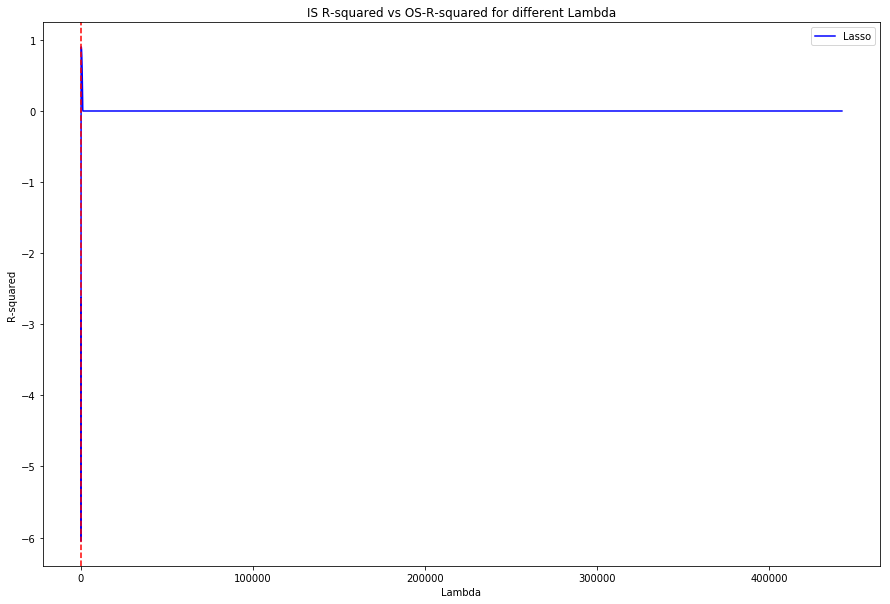

Optimal lambda for Lasso=128.933463234
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.687297622895


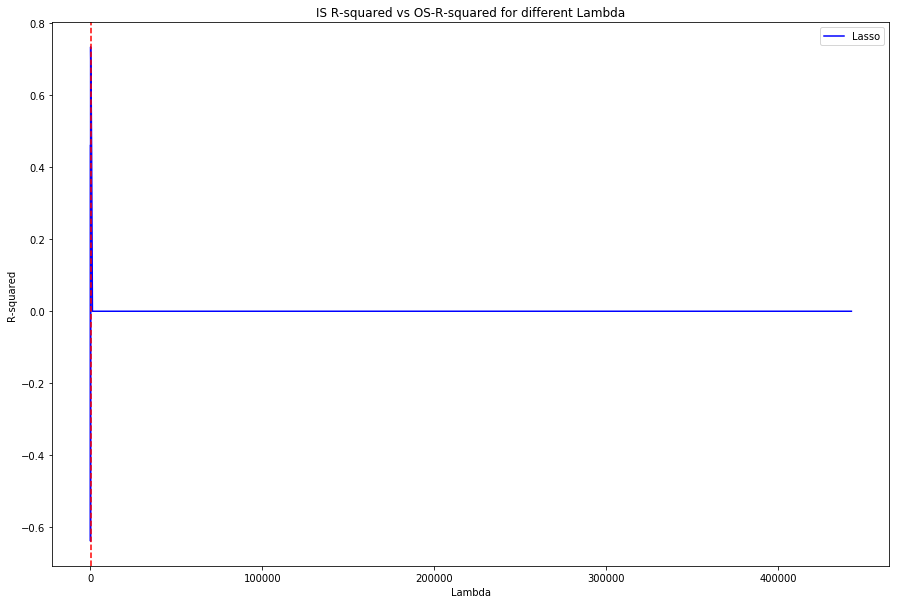

Optimal lambda for Lasso=82.0259102391
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.695631879001


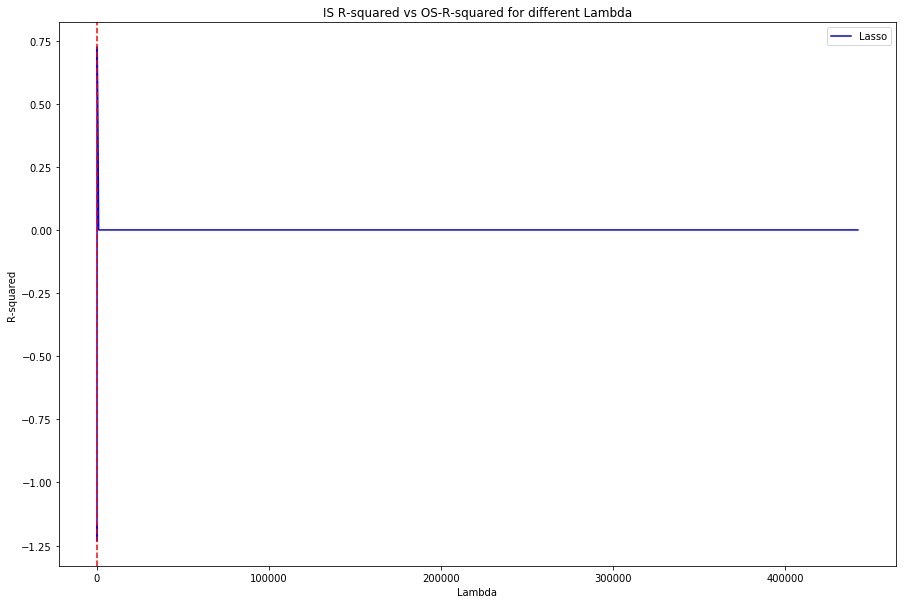

Optimal lambda for Lasso=74.9321407954
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.696247214158


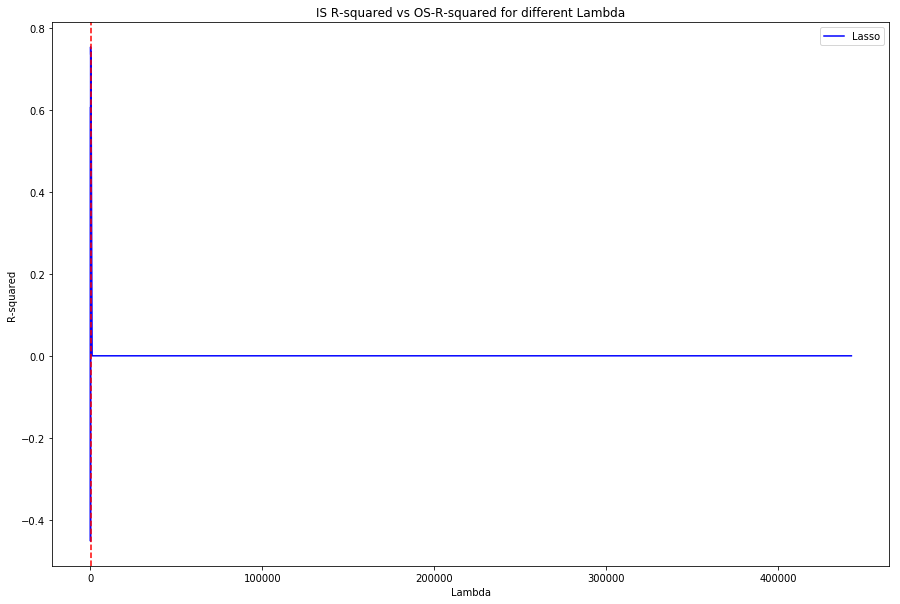

Optimal lambda for Lasso=57.1241020843
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.69102423205


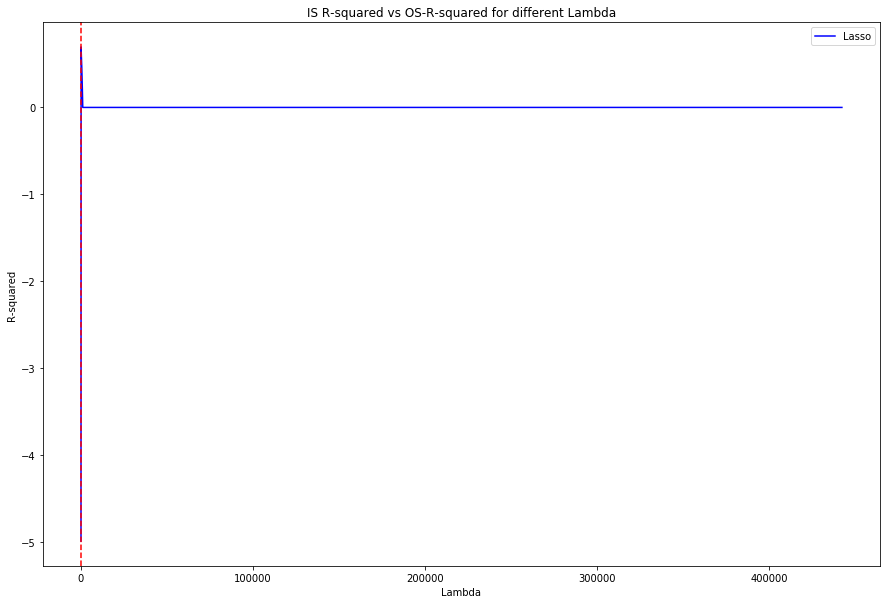

Optimal lambda for Lasso=68.451855125
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.696658393871


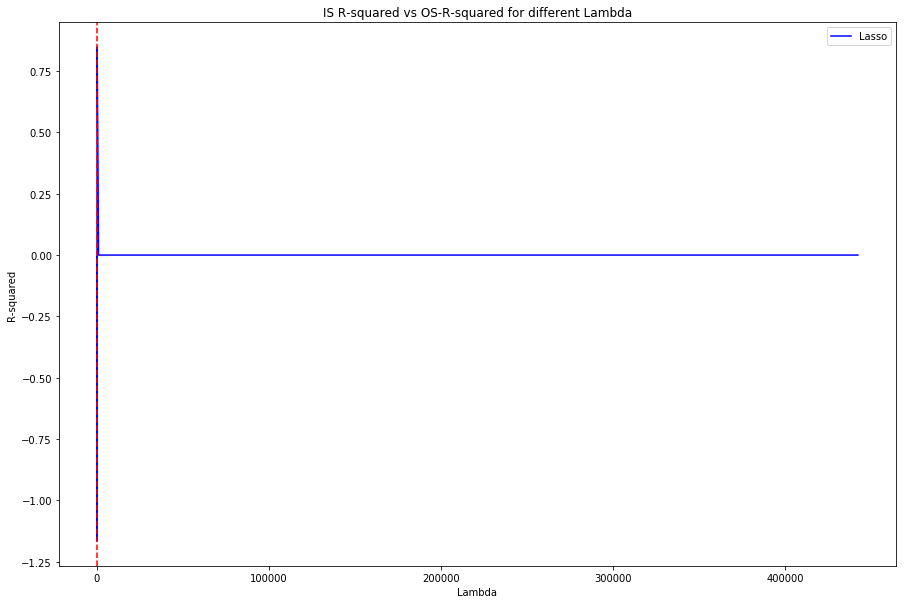

Optimal lambda for Lasso=74.9321407954
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.696247214158


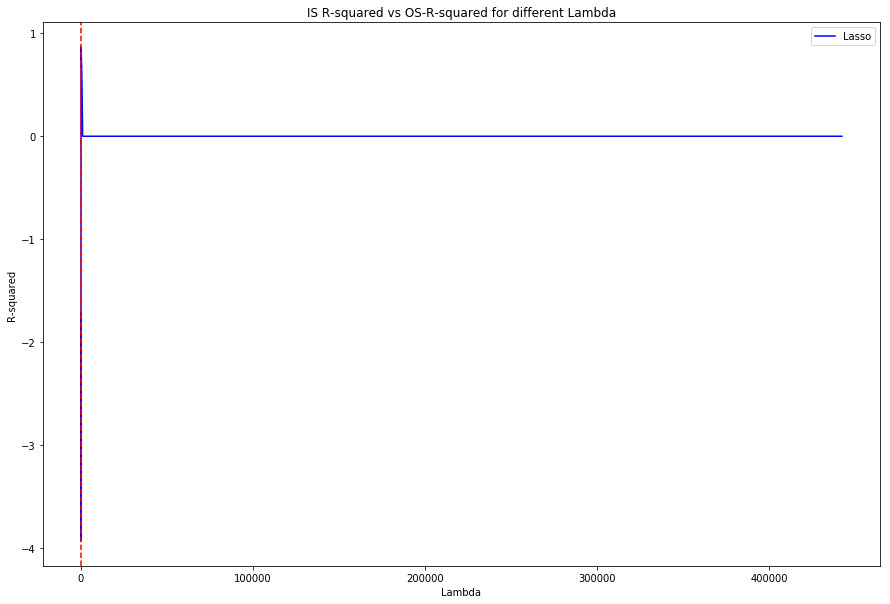

Optimal lambda for Lasso=47.6709218906
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.678168171852


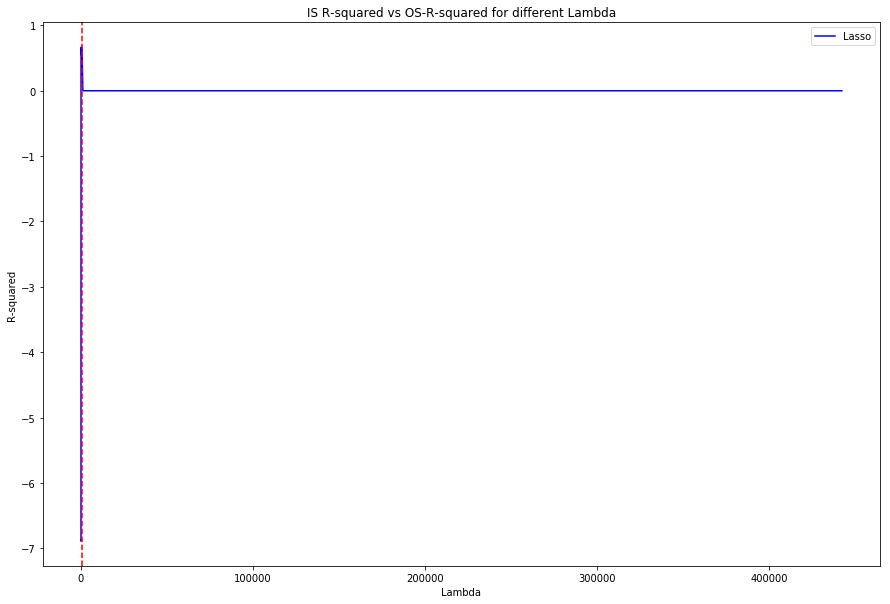

Optimal lambda for Lasso=381.733842388
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.640094500332


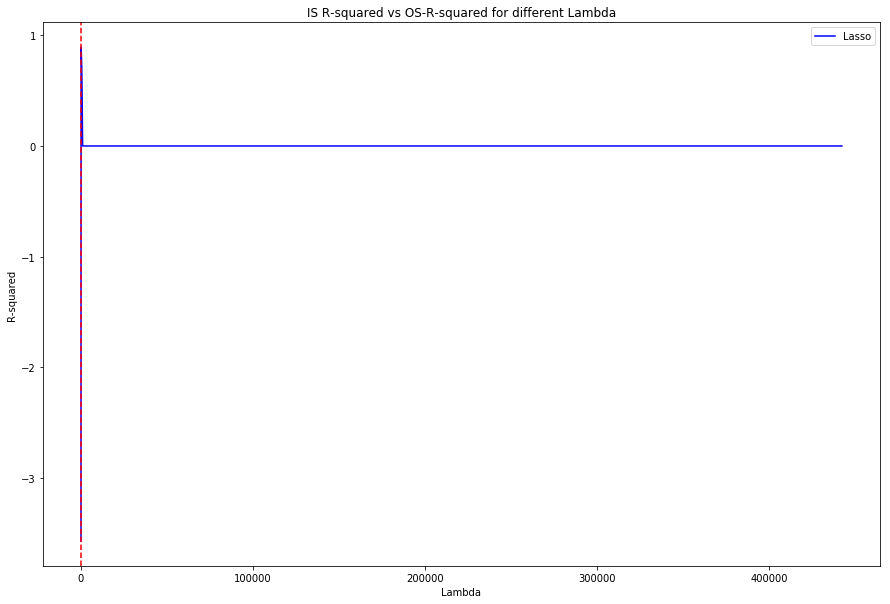

Optimal lambda for Lasso=82.0259102391
The R-squared we found for train set Lasso is: 0.780793007107
The R-squared we found for test set Lasso is: 0.695631879001


In [168]:
#select best lambda for Ridge
for i in range(10):
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.3)
    lambdas = np.exp(np.linspace(-5,13,200))
    lambda_r_optimal=Regularization_fit_lambda(0,X_train0,X_valid,y_train0,y_valid,lambdas,Graph=True)
    print('Optimal lambda for Lasso={0}'.format(lambda_r_optimal))
    Lasso=linear_model.Lasso(fit_intercept=False,alpha=lambda_r_optimal)
    Lasso.fit(X_train,y_train)
    p_IS=Lasso.predict(X_train)
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    print("The R-squared we found for train set Lasso is: {0}".format(R_2_IS_Ridge))

    Lasso_coef=Lasso.coef_
    #Out of sample
    p_OS=Lasso.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    print("The R-squared we found for test set Lasso is: {0}".format(R_2_OS_Lasso))